<a href="https://colab.research.google.com/github/Singh07-Shubham/Custom-Object-Detection/blob/master/kanbanwithtextblock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Custom object Detection 

### model training for object detection using Darknet on personal dataset

In [0]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

In [0]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [0]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

In [0]:
# make darknet (build)
!make

In [0]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-03-27 14:43:09--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   153KB/s    in 18m 30s 

2020-03-27 15:01:41 (218 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [0]:
#mount your google drive
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

In [0]:
# functions to show after prediction
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()


In [0]:
#function to upload files from local system
def upload():
  from google.colab import files
  uploaded_file = files.upload()
  for name , data in uploaded_file.items():
    with open (name, 'wb') as f:
      f.write(data)
      print('saved file', name)

In [0]:
#Function to download file from colab to local system
def download(path):
  from google.colab import files
  files.download(path)

In [0]:
!ls

darknet  gdrive  sample_data


In [0]:
#detection with darknet 
%cd darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg

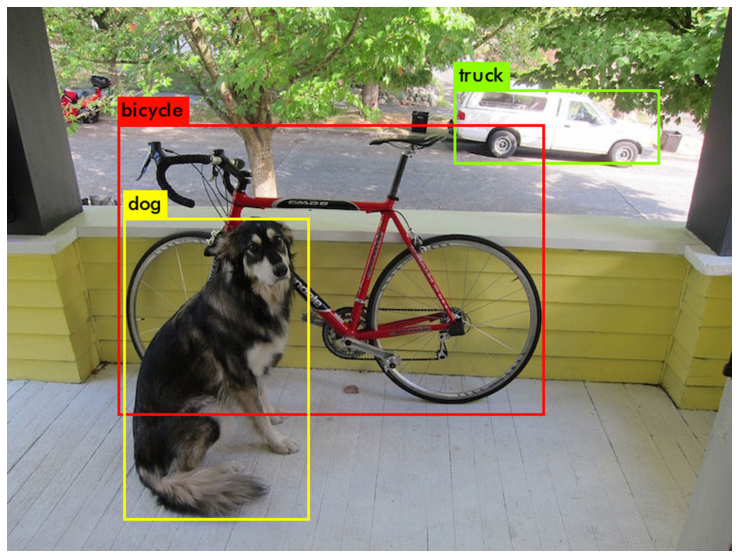

In [0]:
imShow('predictions.jpg')

# Custom Model Training

## 4 Steps:-


1.   custom labelled dataset in YOLO format (compress the folder and save it in your google drive /mydrive/custommodel   )

2.   custom .cfg file (download the file from link given in video description and edit as per your requirements)
 
 or run any one of this and then edit :-

      !cp cfg/yolov3.cfg /mydrive/custommodel/yolov3_custom.cfg

      download('cfg/yolov3.cfg')


3.   two files obj.names & obj.data
4.   train.txt file (generate it by running script.py)





In [0]:
%cd ..

/content


In [0]:
# copy the .zip file into the root directory of cloud VM
!cp /mydrive/custommodel/obj.zip ../

In [0]:
# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip ../obj.zip -d darknet/data/

In [0]:
cd darknet

/content/darknet


In [0]:
#upload the custom cfg file to cloud VM
!cp /mydrive/custommodel/yolov3_custom.cfg cfg/

In [0]:
#upload the name and data file to darknet/data folder
!cp /mydrive/custommodel/obj.names data/
!cp /mydrive/custommodel/obj.data data/

In [0]:
# upload the script.py script to cloud VM from Google Drive
!cp /mydrive/custommodel/script.py ./

In [0]:
#run the script.py and it will create a train.txt(having realtive path of all images and .txt file) file in darkent/data/ 
!python script.py

In [0]:
#see the generated train.txt file
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     train.txt
coco.names  goal.txt	 labels			   openimages.names  voc.names
dog.jpg     horses.jpg	 obj			   person.jpg


In [0]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

URL transformed to HTTPS due to an HSTS policy
--2020-03-27 15:15:27--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   198KB/s    in 13m 0s  

2020-03-27 15:28:30 (203 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [0]:
# train your custom detector
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show


Note:

after each 1000 iteration yolov3_custom_1000.weights ...  yolov3_custom_2000.weights etc will be genearted. and at last yolov3_custom_final.weights will be generated

yolov3_custom_last.weights will keep updating on each iteration so use it for retraining if colab crashes.

If google colab crashes while training then use your custom weighted file to retrain. it will re-start training from the iteration number it has stopped.

command for this 

!./darknet detector train data/obj.data cfg/yolov3_custom.cfg  /mydrive/custommodel/yolov3_custom_last.weights -dont_show


In [0]:
# uncomment it and run to restart your model training from the last iteration it crashed

#!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/custommodel/yolov3_custom_last.weights -dont_show

In [0]:
#change the custom cfg file from training mode to testing mode for testing the newely generated weighted file

%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..

/content/darknet/cfg
/content/darknet


In [0]:
#command for detection with new weighted file

!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/custommodel/yolov3_custom_final.weights /mydrive/Images/Kanban.png -thresh 0.3


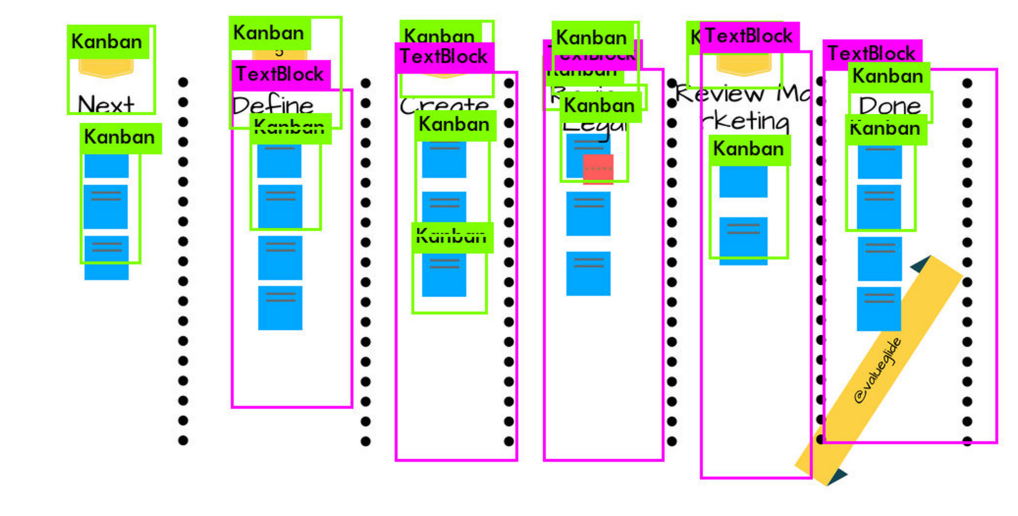

In [0]:
imShow('predictions.jpg')

In [0]:
#saving the result to google drive 
!cp predictions.jpg /mydrive/Images/Predictions/testkanban.jpg